# Анализ бизнес-показателей

<hr style="border: 2px solid blue;" />

## Описание проекта

Цель проекта - помочь маркетологам снизить расходы (отказаться от невыгодных источников трафика и перераспределить бюджет).

Что предстоит выяснить:
1. как клиенты пользуются сервисом,
2. когда делают первые покупки на сайте,
3. сколько денег приносит компании каждый клиент,
4. когда расходы на привлечение клиента окупаются.

В наличии данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:

1. Лог сервера с данными о посещениях сайта Яндекс.Афиши,
2. Выгрузка всех заказов за этот период,
3. Статистика рекламных расходов.

Выручка измеряется в условных единицах — у.е.

# Загрузка данных и подготовка к анализу

<hr style="border: 2px solid blue;" />

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [27]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [28]:
list = [visits, orders, costs]
for i in list:
    display(i.head())
    i.info()
    display(i.duplicated().sum())
    display(i.isna().sum())
    print('     ')
    print('----- Конец информации о таблице по порядку -----')
    print('     ')

Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


0

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

     
----- Конец информации о таблице по порядку -----
     


Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


0

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

     
----- Конец информации о таблице по порядку -----
     


source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


0

source_id    0
dt           0
costs        0
dtype: int64

     
----- Конец информации о таблице по порядку -----
     


Судя по всему, данные неплохого качества. Пропуски или дубликаты отсутствуют. Предстоит перевести данные с датами из object в datetime, привести к нижнему регистру название колонок и можно начинать анализ.

In [29]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
display(visits.head())

device               end_ts  source_id             start_ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

In [30]:
orders.columns = ['buy_ts', 'revenue', 'uid']
display(orders.head())

buy_ts  revenue                   uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

In [31]:
costs.columns = ['source_id', 'date_marketing', 'costs']
display(costs.head())

source_id date_marketing  costs
0          1     2017-06-01  75.20
1          1     2017-06-02  62.25
2          1     2017-06-03  36.53
3          1     2017-06-04  55.00
4          1     2017-06-05  57.08

In [32]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format='%Y.%m.%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format='%Y.%m.%d %H:%M:%S')
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format='%Y.%m.%d')
costs['date_marketing'] = pd.to_datetime(costs['date_marketing'], format='%Y.%m.%d')

# Расчет метрик и построение графиков

<hr style="border: 2px solid blue;" />

## Продуктовые метрики

Рассчитаем DAU, MAU, WAU.

In [33]:
#выделяем временные периоды для расчета
visits['ssn_date'] = visits['start_ts'].dt.date
visits['ssn_week'] = visits['start_ts'].dt.week
visits['ssn_month'] = visits['start_ts'].dt.month
visits['ssn_year'] = visits['start_ts'].dt.year

In [34]:
#считаем метрики
dau = visits.groupby('ssn_date').agg({'uid':'nunique'})
display(int(dau.mean()))

907

In [35]:
wau = visits.groupby(['ssn_year', 'ssn_week']).agg({'uid':'nunique'})
display(int(wau.mean()))

5716

In [36]:
mau = visits.groupby(['ssn_year', 'ssn_month']).agg({'uid':'nunique'})
display(int(mau.mean()))

23228

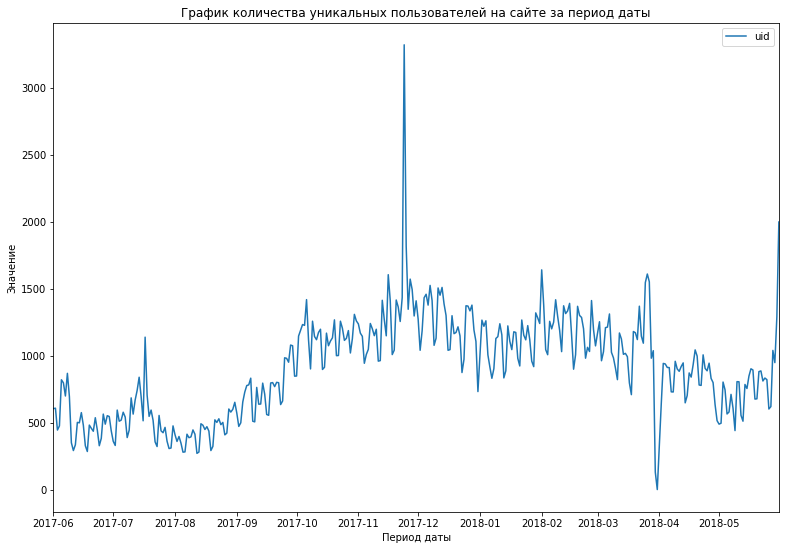

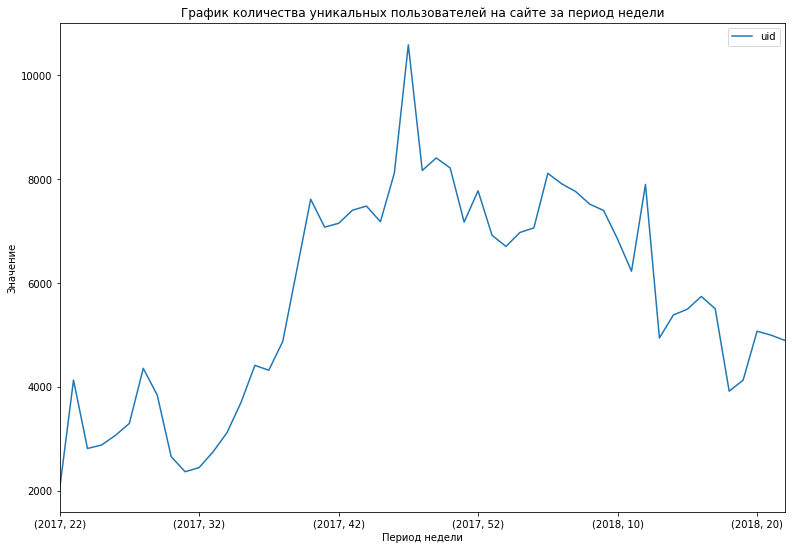

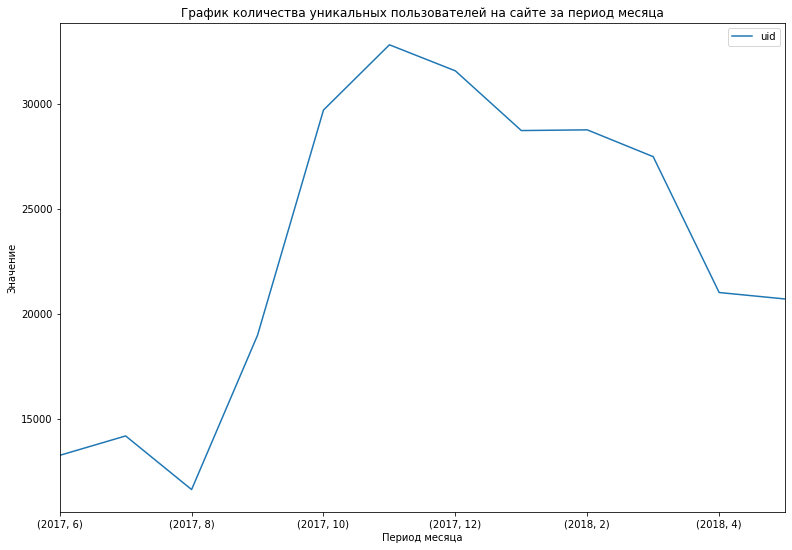

In [37]:
#рисуем графики через функцию
list_user_metrics = {'даты':dau, 'недели':wau, 'месяца':mau}
for name, value in list_user_metrics.items():
    value.plot(figsize=(13,9))
    plt.title('График количества уникальных пользователей на сайте за период ' + name)
    plt.ylabel('Значение')
    plt.xlabel('Период ' + name)

Метрики имеют периоды аномальной активности, скорее всего, связанные с сезонными обстоятельствами. Например, в марте 2018 мы видим резкий рост посещений пользователями и затем резкий спад. Возможно, это связано с международным женским днем. Как известно, подобного рода покупки (билеты в кино, на спектакли и т.д.) имеют четко выраженную периодичность. Если взять какого-либо пользователя, то можно обнаружить, что он покупает билеты (в кино, например) с определенной периодичностью. У каждого клиента она своя, но если происходит событие, вынуждающее пользователя нарушить свои привычки, его периодичность активности нарушается и на графике мы наблюдаем неравномерное распределение посещений за данный период. По аналогии это работает и с другими примерами.

Общие периоды наибольшей активности пользователей схожи - с конца августа по конец декабря и затем начинается спад. Это связано с возвращением пользователей из отпусков после августа и постепенной сменой сезонных активностей.

Рассчитаем количество посещений по периоду

In [38]:
date_cnt = visits.groupby('ssn_date').agg({'uid':'count'})
week_cnt = visits.groupby(['ssn_year', 'ssn_week']).agg({'uid':'count'})
month_cnt = visits.groupby(['ssn_year', 'ssn_month']).agg({'uid':'count'})

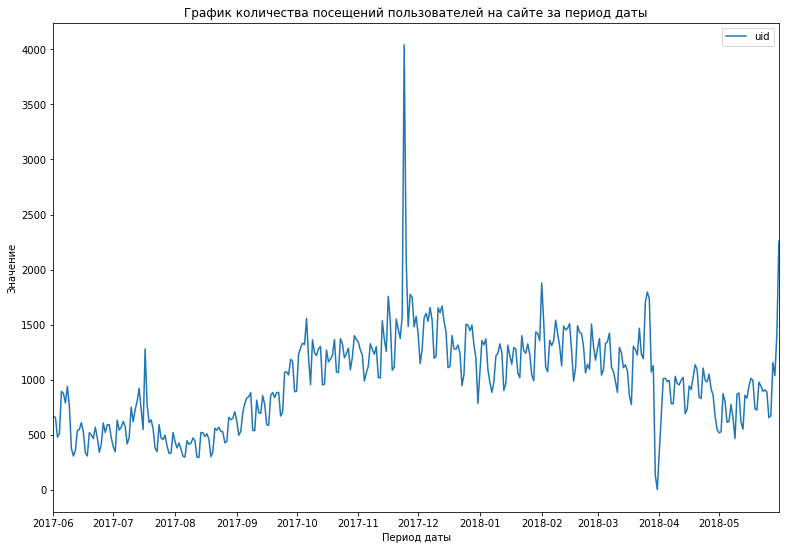

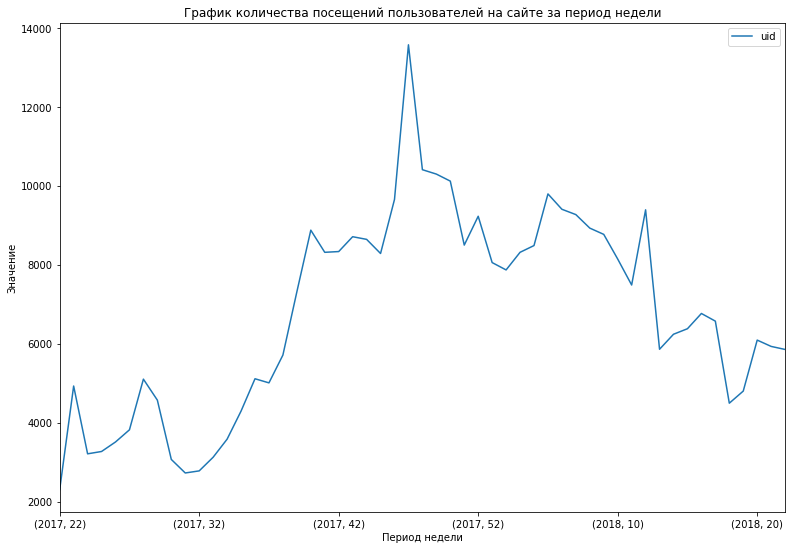

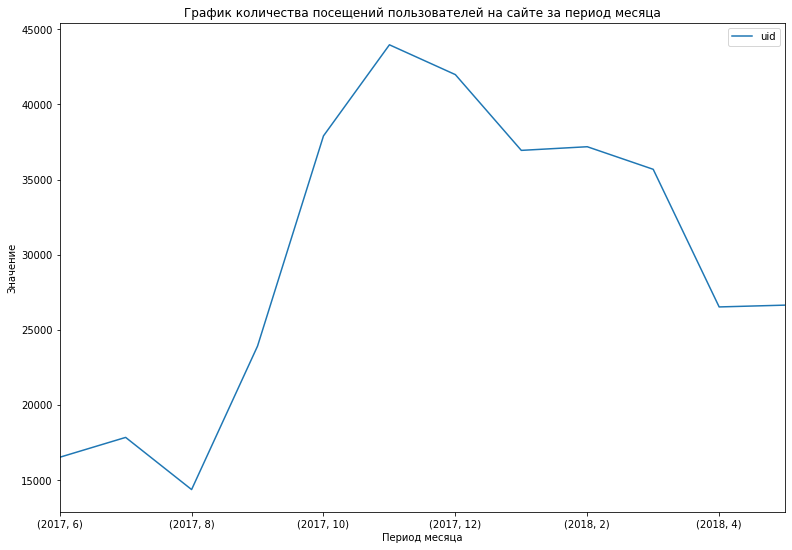

In [39]:
#рисуем графики через функцию
list_user_metrics = {'даты':date_cnt, 'недели':week_cnt, 'месяца':month_cnt}
for name, value in list_user_metrics.items():
    value.plot(figsize=(13,9))
    plt.title('График количества посещений пользователей на сайте за период ' + name)
    plt.ylabel('Значение')
    plt.xlabel('Период ' + name)

Посчитаем ASL и выведем график средней продолжительности пользовательской сессии

Text(0.5, 0, 'Продолжительность сессии пользователей')

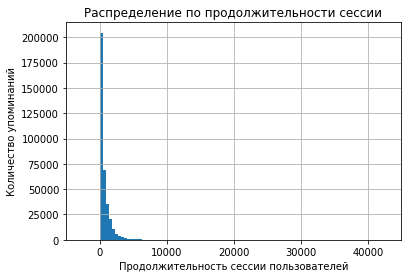

In [40]:
visits['ssn_dur_sec'] = ( visits['end_ts'] - visits['start_ts'] ).dt.total_seconds()
visits['ssn_dur_sec'].hist(bins=100)
plt.title('Распределение по продолжительности сессии')
plt.ylabel('Количество упоминаний')
plt.xlabel('Продолжительность сессии пользователей')

In [41]:
asl = visits['ssn_dur_sec'].mode()
display(asl)

0    60.0
dtype: float64

In [42]:
visits['ssn_dur_sec'].describe()

count    359400.000000
mean        643.025687
std         997.127761
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: ssn_dur_sec, dtype: float64

In [43]:
first_activity_date = orders.groupby(['uid'])['buy_ts'].min()
first_activity_date.name = 'first_activity_date'
orders = orders.join(first_activity_date, on='uid')
orders.head()

buy_ts  revenue                   uid first_activity_date
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00

Выделим когорты по первому месяцу заказа и рассчитаем Retention Rate

In [44]:
orders['activity_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['first_activity_month'] = orders['first_activity_date'].astype('datetime64[M]')

orders['cohort_lifetime'] =(
    orders['activity_month'] - orders['first_activity_month']
)
orders['cohort_lifetime'] = ( 
    orders['cohort_lifetime'] / np.timedelta64(1, 'M')
)
orders['cohort_lifetime'] = orders['cohort_lifetime'].round().astype('int')


cohorts = orders.groupby(['first_activity_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
display(cohorts)

first_activity_month  cohort_lifetime   uid
0            2017-06-01                0  2023
1            2017-06-01                1    61
2            2017-06-01                2    50
3            2017-06-01                3    54
4            2017-06-01                4    88
..                  ...              ...   ...
74           2018-03-01                2    58
75           2018-04-01                0  2276
76           2018-04-01                1    69
77           2018-05-01                0  2988
78           2018-06-01                0     1

[79 rows x 3 columns]

In [45]:
initial_uid = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_activity_month', 'uid']
]
initial_uid = initial_uid.rename(columns={'uid':'cohort_uid'})

cohorts = cohorts.merge(initial_uid, on='first_activity_month')

display(cohorts)

first_activity_month  cohort_lifetime   uid  cohort_uid
0            2017-06-01                0  2023        2023
1            2017-06-01                1    61        2023
2            2017-06-01                2    50        2023
3            2017-06-01                3    54        2023
4            2017-06-01                4    88        2023
..                  ...              ...   ...         ...
74           2018-03-01                2    58        3533
75           2018-04-01                0  2276        2276
76           2018-04-01                1    69        2276
77           2018-05-01                0  2988        2988
78           2018-06-01                0     1           1

[79 rows x 4 columns]

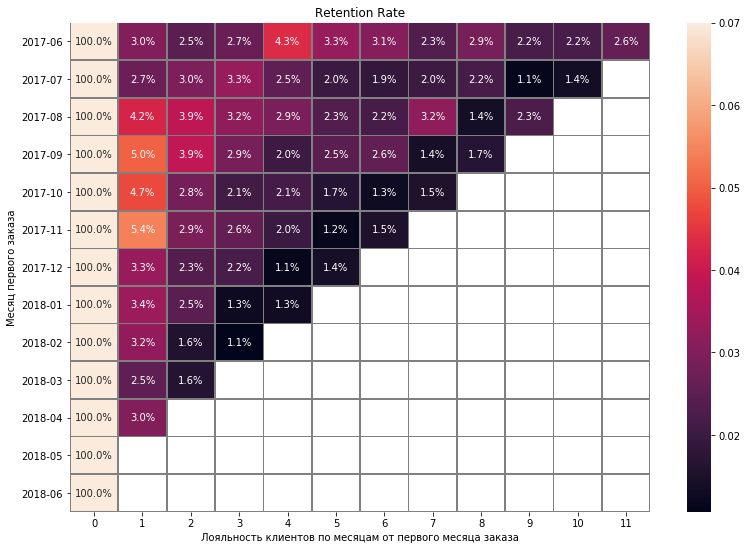

In [46]:
cohorts['first_activity_month'] = cohorts['first_activity_month'].dt.strftime('%Y-%m')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_uid']

retention_pivot = cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='mean'
)

plt.figure(figsize=(13,9))
sns.heatmap(retention_pivot, fmt='.1%', annot=True, linewidth=0.7, linecolor='grey', vmax=0.07)
plt.title('Retention Rate')
plt.ylabel('Месяц первого заказа')
plt.xlabel('Лояльность клиентов по месяцам от первого месяца заказа')
plt.show()

Судя по всему, количество уникальных пользователей также, как и количество посещений Яндекс.Афиши возрастает с августа к концу года и затем снижается к летнему периоду. 

Активные пики посещений и заказов - август, сентябрь, ноябрь, а также май.

Думаю, в августе активность пользователей может возрастать в связи с окончанием сезона отпусков, а к концу года и в мае в связи с приближением праздников

Если не учитывать низкий процент повторных заказов в целом, то Retention Rate лучше всего сохраняется у пользователей, совершивших первые покупки с мая до августа.

Поскольку второй месяц является самым важным для жизни когорт, рассчитаем средний RR за 2 месяц жизни когорт.

In [47]:
print('Средний RR за период 2 месяца жизни составил -', (retention_pivot[1].mean() * 100).round(2))

Средний RR за период 2 месяца жизни составил - 3.7


## Метрики электронной коммерции

Изучим сколько времени проходит с первого посещения до покупки

In [48]:
orders_grouped = orders.groupby('uid')['buy_ts'].min()
orders_grouped.name = 'orders_ts'
time_visit_order = visits.join(orders_grouped, how='left', on='uid')

In [49]:
time_visit_order = time_visit_order[time_visit_order['orders_ts'] > time_visit_order['start_ts']]
time_visit_order.head()

device              end_ts  source_id            start_ts  \
5   desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
15    touch 2018-02-12 20:30:00          2 2018-02-12 19:24:00   
27  desktop 2017-10-23 12:58:00          3 2017-10-23 12:49:00   
37  desktop 2018-03-12 23:25:00          3 2018-03-12 23:13:00   
38    touch 2018-03-01 08:45:00          4 2018-03-01 08:43:00   

                     uid    ssn_date  ssn_week  ssn_month  ssn_year  \
5   16007536194108375387  2017-09-03        35          9      2017   
15  18188358787673499603  2018-02-12         7          2      2018   
27   4499746016005494365  2017-10-23        43         10      2017   
37  15857957287537270437  2018-03-12        11          3      2018   
38  15763368622958393183  2018-03-01         9          3      2018   

    ssn_dur_sec           orders_ts  
5          60.0 2017-09-04 12:46:00  
15       3960.0 2018-02-12 19:48:00  
27        540.0 2017-11-16 14:04:00  
37        720.0 2018-03-12 23:17:00  
38        120.0 2018-03-06 18:33:00

In [50]:
time_visit_order['time_visit_order'] = (time_visit_order['orders_ts'] - time_visit_order['start_ts']).dt.seconds
time_visit_order['time_visit_order'] = time_visit_order['time_visit_order'] / 60

display(time_visit_order['time_visit_order'].median())
display(time_visit_order['time_visit_order'].min())
display(time_visit_order['time_visit_order'].max())

32.0

0.0

1439.0

В среднем, от начала сессии до покупки проходит 32 минуты

Рассчитаем среднее количество покупок на одного покупателя за 6 месяцев

In [51]:
orders.head()

buy_ts  revenue                   uid first_activity_date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

  activity_month first_activity_month  cohort_lifetime  
0     2017-06-01           2017-06-01                0  
1     2017-06-01           2017-06-01                0  
2     2017-06-01           2017-06-01                0  
3     2017-06-01           2017-06-01                0  
4     2017-06-01           2017-06-01                0

In [52]:
orders['first_activity_month'] = orders['first_activity_month'].astype('datetime64[M]')
orders['activity_month'] = orders['activity_month'].astype('datetime64[M]')

cohort_sizes = (
    orders.groupby('activity_month')
    .agg({'uid': ['nunique', 'count']})
    .reset_index()
)

cohort_sizes.columns = ['activity_month', 'n_buyers', 'cnt_orders']
cohort_sizes['orders_per_user'] = cohort_sizes['cnt_orders'] / cohort_sizes['n_buyers']
cohort_sizes['orders_per_user'] = round(cohort_sizes['orders_per_user'], 2)

cohort_sizes = cohort_sizes.query('activity_month >= "2017-05-01" and activity_month <= "2017-10-01" ')

display(cohort_sizes)

activity_month  n_buyers  cnt_orders  orders_per_user
0     2017-06-01      2023        2354             1.16
1     2017-07-01      1984        2363             1.19
2     2017-08-01      1472        1807             1.23
3     2017-09-01      2750        3387             1.23
4     2017-10-01      4675        5679             1.21

In [53]:
#plt.figure(figsize=(13, 9))
#sns.lineplot(data=cohort_sizes ,x='activity_month', y='orders_per_user')

В среднем, пользователи совершают 1-2 заказа в месяц. В расчет у нас взят период мая по октябрь 2017 года. Не смотря на рост заказов к сентябрю, количество заказов на одного пользователя практически не изменяется, что говорит о слабой продолжительности жизни отдельно взятого клиента на платформе.

In [54]:
av_check = orders.groupby('activity_month').agg({'uid':'count', 'revenue':'sum'}).reset_index()

av_check['average_check'] = av_check['revenue'] / av_check['uid']
display(av_check)

activity_month   uid   revenue  average_check
0      2017-06-01  2354   9557.49       4.060106
1      2017-07-01  2363  12539.47       5.306589
2      2017-08-01  1807   8758.78       4.847139
3      2017-09-01  3387  18345.51       5.416448
4      2017-10-01  5679  27987.70       4.928280
5      2017-11-01  5659  27069.93       4.783518
6      2017-12-01  6218  36388.60       5.852139
7      2018-01-01  4721  19417.13       4.112927
8      2018-02-01  5281  25560.54       4.840095
9      2018-03-01  5326  28834.59       5.413930
10     2018-04-01  3273  16858.06       5.150645
11     2018-05-01  4346  20735.98       4.771279
12     2018-06-01     1      3.42       3.420000

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

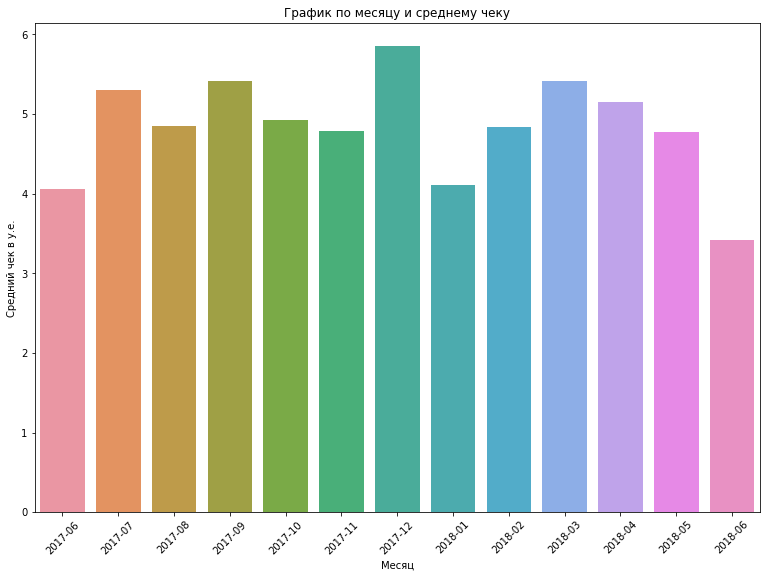

In [55]:
av_check['activity_month'] = av_check['activity_month'].dt.strftime('%Y-%m')


plt.figure(figsize=(13, 9))
sns.barplot(data=av_check ,x='activity_month', y='average_check')
plt.title('График по месяцу и среднему чеку')
plt.xlabel('Месяц')
plt.ylabel('Средний чек в у.е.')
plt.xticks(rotation=45)

Рассчитаем LTV и построим график

In [56]:
uids_sources = visits.groupby('uid', as_index=False).agg({'source_id':'first'})

orders = orders.merge(uids_sources, on='uid')
orders.head()

buy_ts  revenue                   uid first_activity_date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

  activity_month first_activity_month  cohort_lifetime  source_id  
0     2017-06-01           2017-06-01                0          1  
1     2017-06-01           2017-06-01                0          2  
2     2017-06-01           2017-06-01                0          2  
3     2017-06-01           2017-06-01                0          2  
4     2017-06-01           2017-06-01                0          3

In [57]:
cohort_sizes = (
    orders.groupby(['source_id', 'first_activity_month'])
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['source_id', 'first_activity_month', 'n_buyers']

cohorts = (
    orders.groupby(['source_id', 'first_activity_month', 'activity_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)

report = pd.merge(cohorts, cohort_sizes, on=['source_id', 'first_activity_month'])
report.head()

source_id first_activity_month activity_month  revenue  n_buyers
0          1           2017-06-01     2017-06-01  1168.45       203
1          1           2017-06-01     2017-07-01   362.94       203
2          1           2017-06-01     2017-08-01   153.72       203
3          1           2017-06-01     2017-09-01   695.88       203
4          1           2017-06-01     2017-10-01   760.74       203

In [58]:
margin_rate = 1

report['gp'] = report['revenue'] * margin_rate

report['age'] = (report['activity_month'] - report['first_activity_month']) / np.timedelta64(1, 'M')

report['age'] = report['age'].round().astype('int')

report['ltv'] = report['gp'] / report['n_buyers']

report['first_activity_month'] = report['first_activity_month'].dt.strftime('%Y-%m')

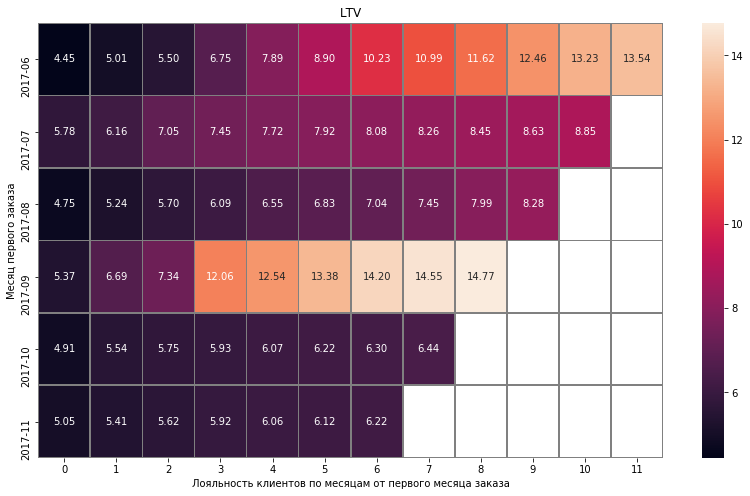

In [59]:
output = report.pivot_table(index='first_activity_month', columns='age', values='ltv', aggfunc='mean').cumsum(axis=1).round(2)

output = output.query('index >= "2017-05" and index <= "2017-11"')

plt.figure(figsize=(14,8))
sns.heatmap(output, fmt='.2f', annot=True, linewidth=0.7, linecolor='grey')
plt.title('LTV')
plt.ylabel('Месяц первого заказа')
plt.xlabel('Лояльность клиентов по месяцам от первого месяца заказа')
plt.show()

In [60]:
m6_cum_ltv = output.mean(axis=0)[6]
print('Средний LTV за 6 месяцев после первой покупки:', m6_cum_ltv)

Средний LTV за 6 месяцев после первой покупки: 8.678333333333333


## Маркетинговые метрики

Посчитаем общую сумму расходов на маркетинг и выясним траты по источнику.

In [61]:
costs['month'] = costs['date_marketing'].astype('datetime64[M]')
costs.head()

source_id date_marketing  costs      month
0          1     2017-06-01  75.20 2017-06-01
1          1     2017-06-02  62.25 2017-06-01
2          1     2017-06-03  36.53 2017-06-01
3          1     2017-06-04  55.00 2017-06-01
4          1     2017-06-05  57.08 2017-06-01

In [62]:
costs_all = costs['costs'].sum()
display(costs_all)

329131.62

Общая сумма расходов на маркетинг составляет 329131.62 условных единиц.

In [63]:
costs_per_source = costs.groupby('source_id').agg({'costs':'sum'})
display(costs_per_source)

costs
source_id           
1           20833.27
2           42806.04
3          141321.63
4           61073.60
5           51757.10
9            5517.49
10           5822.49

Наиболее затратным является источник номер 3, наименее затратным - источник номер 9. Топ три по затратам - 3-й, 4-й и 5-й.

In [64]:
costs['month'] = costs['month'].dt.strftime('%Y-%m')
costs_pivot = costs.pivot_table(
    index='source_id',
    columns='month',
    values='costs',
    aggfunc='sum'
)

display(costs_pivot)

month      2017-06  2017-07  2017-08  2017-09   2017-10   2017-11   2017-12  \
source_id                                                                     
1          1125.61  1072.88   951.81  1502.01   2315.75   2445.16   2341.20   
2          2427.38  2333.11  1811.05  2985.66   4845.00   5247.68   4897.80   
3          7731.65  7674.37  6143.54  9963.55  15737.24  17025.34  16219.52   
4          3514.80  3529.73  3217.36  5192.26   6420.84   5388.82   7680.47   
5          2616.12  2998.14  2185.28  3849.14   5767.40   6325.34   5872.52   
9           285.22   302.54   248.93   415.62    609.41    683.18    657.98   
10          314.22   329.82   232.57   460.67    627.24    792.36    645.86   

month       2018-01   2018-02   2018-03  2018-04  2018-05  
source_id                                                  
1           2186.18   2204.48   1893.09  1327.49  1467.61  
2           4157.74   4474.34   3943.14  2993.70  2689.44  
3          14808.78  14228.56  13080.85  9296.81  9411.42  
4           5832.79   5711.96   5961.87  4408.49  4214.21  
5           5371.52   5071.31   4529.62  3501.15  3669.56  
9            547.16    551.50    480.29   373.49   362.17  
10           614.35    480.88    526.41   388.25   409.86

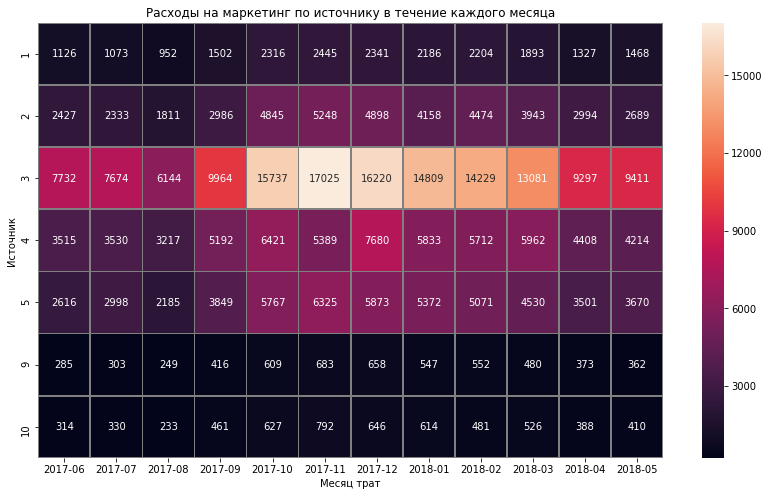

In [65]:
plt.figure(figsize=(14,8))
sns.heatmap(costs_pivot, fmt='.0f', annot=True, linewidth=0.7, linecolor='grey')
plt.title('Расходы на маркетинг по источнику в течение каждого месяца')
plt.ylabel('Источник')
plt.xlabel('Месяц трат')
plt.show()

В каждом источнике затраты постепенно снижаются к концу августа и резко возрастают с сентября до декабря. 
После нового года затраты начинают постепенно снижаться.

Рассчитаем общий CAC для всего проекта и для каждого источника в отдельности

In [66]:
visits['month'] = visits['start_ts'].astype('datetime64[M]')
visits['month'] = visits['month'].dt.strftime('%Y-%m')

visits_source_month = visits.groupby(['month', 'source_id']).agg({'uid':'nunique'}).reset_index()

In [67]:
visits.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid    ssn_date  ssn_week  ssn_month  ssn_year  \
0  16879256277535980062  2017-12-20        51         12      2017   
1    104060357244891740  2018-02-19         8          2      2018   
2   7459035603376831527  2017-07-01        26          7      2017   
3  16174680259334210214  2018-05-20        20          5      2018   
4   9969694820036681168  2017-12-27        52         12      2017   

   ssn_dur_sec    month  
0       1080.0  2017-12  
1       1680.0  2018-02  
2          0.0  2017-07  
3       1440.0  2018-05  
4          0.0  2017-12

In [68]:
orders.head()

buy_ts  revenue                   uid first_activity_date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

  activity_month first_activity_month  cohort_lifetime  source_id  
0     2017-06-01           2017-06-01                0          1  
1     2017-06-01           2017-06-01                0          2  
2     2017-06-01           2017-06-01                0          2  
3     2017-06-01           2017-06-01                0          2  
4     2017-06-01           2017-06-01                0          3

In [69]:
n_buyers_all = orders.groupby('activity_month').agg({'uid':'nunique'}).sum()
display(n_buyers_all)

uid    41019
dtype: int64

In [70]:
cac_all = costs_all / n_buyers_all
display(cac_all)

uid    8.023882
dtype: float64

In [71]:
monthly_costs = costs.groupby(['month', 'source_id'])['costs'].sum().reset_index()
monthly_costs.head()

month  source_id    costs
0  2017-06          1  1125.61
1  2017-06          2  2427.38
2  2017-06          3  7731.65
3  2017-06          4  3514.80
4  2017-06          5  2616.12

In [72]:
visits_source_month.head()

month  source_id   uid
0  2017-06          1   972
1  2017-06          2  1532
2  2017-06          3  4226
3  2017-06          4  3636
4  2017-06          5  2903

In [73]:
monthly_costs = monthly_costs.merge(
    visits_source_month, on=['month', 'source_id']
)

CAC для всего проекта равен 8 у.е. на одного привлеченного пользователя

In [74]:
report_new = pd.merge(
    monthly_costs, report, left_on=['month', 'source_id'], right_on=['first_activity_month', 'source_id']
)

report_new['cac'] = report_new['costs'] / report_new['n_buyers']
display(report_new)

month  source_id    costs   uid first_activity_month activity_month  \
0    2017-06          1  1125.61   972              2017-06     2017-06-01   
1    2017-06          1  1125.61   972              2017-06     2017-07-01   
2    2017-06          1  1125.61   972              2017-06     2017-08-01   
3    2017-06          1  1125.61   972              2017-06     2017-09-01   
4    2017-06          1  1125.61   972              2017-06     2017-10-01   
..       ...        ...      ...   ...                  ...            ...   
508  2018-05          3  9411.42  5343              2018-05     2018-05-01   
509  2018-05          4  4214.21  7275              2018-05     2018-05-01   
510  2018-05          5  3669.56  4038              2018-05     2018-05-01   
511  2018-05          9   362.17   753              2018-05     2018-05-01   
512  2018-05         10   409.86   777              2018-05     2018-05-01   

     revenue  n_buyers       gp  age       ltv        cac  
0    1168.45       203  1168.45    0  5.755911   5.544877  
1     362.94       203   362.94    1  1.787882   5.544877  
2     153.72       203   153.72    2  0.757241   5.544877  
3     695.88       203   695.88    3  3.427980   5.544877  
4     760.74       203   760.74    4  3.747488   5.544877  
..       ...       ...      ...  ...       ...        ...  
508  2990.65       785  2990.65    0  3.809745  11.989070  
509  3616.23       767  3616.23    0  4.714772   5.494407  
510  2103.24       510  2103.24    0  4.124000   7.195216  
511   200.38        53   200.38    0  3.780755   6.833396  
512   478.93       117   478.93    0  4.093419   3.503077  

[513 rows x 12 columns]

In [75]:
source_cac = report_new.pivot_table( 
    index='source_id',
    columns='age',
    values='cac',
    aggfunc='mean'
)

display(source_cac)

age               0          1          2          3          4          5   \
source_id                                                                     
1           5.600034   5.674538   5.700159   5.729075   5.646485   5.526385   
2          10.087368  10.459870  10.317881  10.320378  10.134720   9.850867   
3          15.884857  16.239020  16.078505  16.163100  16.353683  16.192237   
4           6.687370   6.795822   6.809469   6.913436   7.091741   7.271592   
5           7.553257   7.585806   7.541371   7.485356   7.477701   7.359916   
9           4.301936   4.071803   3.700879   3.834142   3.719121   3.478545   
10          5.259864   5.143985   5.472223   6.060143   5.170574   7.320679   

age               6          7          8          9          10         11  
source_id                                                                    
1           5.595484   5.632652   5.625320   5.731274   5.314808   5.544877  
2           9.895222   9.840281   9.868123   9.957433   9.017685   8.957122  
3          16.523822  16.519482  16.844411  17.326010  15.396704  13.469774  
4           7.490445   8.030521   8.586787   8.480347   7.830915   8.428777  
5           7.262140   6.789045   6.932589   7.050210   7.274288   7.109022  
9           3.479976   3.317200   3.440698   2.866289   3.401496        NaN  
10          5.839062   6.530117   5.193141        NaN        NaN   3.611724

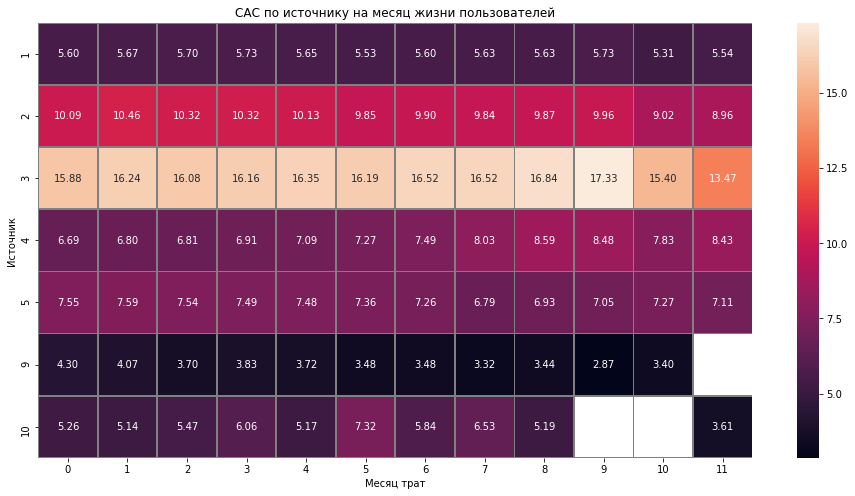

In [76]:
plt.figure(figsize=(16,8))
sns.heatmap(source_cac, fmt='.2f', annot=True, linewidth=0.7, linecolor='grey')
plt.title('CAC по источнику на месяц жизни пользователей')
plt.ylabel('Источник')
plt.xlabel('Месяц трат')
plt.show()

Затраты на привлечение одного пользователя по кажому из источников возрастают к октябрю и с ноября по январь резко снижаются, возрастая вновь с февраля. Источник номер 3 является самым дорогим по привлечению одного пользователя.

Рассчитаем ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт.

In [110]:
report_new['romi'] = report_new['ltv'] / report_new['cac']
report_new.head()

month  source_id    costs  uid first_activity_month activity_month  \
0  2017-06          1  1125.61  972              2017-06     2017-06-01   
1  2017-06          1  1125.61  972              2017-06     2017-07-01   
2  2017-06          1  1125.61  972              2017-06     2017-08-01   
3  2017-06          1  1125.61  972              2017-06     2017-09-01   
4  2017-06          1  1125.61  972              2017-06     2017-10-01   

   revenue  n_buyers       gp  age       ltv       cac      romi  
0  1168.45       203  1168.45    0  5.755911  5.544877  1.038059  
1   362.94       203   362.94    1  1.787882  5.544877  0.322439  
2   153.72       203   153.72    2  0.757241  5.544877  0.136566  
3   695.88       203   695.88    3  3.427980  5.544877  0.618225  
4   760.74       203   760.74    4  3.747488  5.544877  0.675847

In [111]:
source_list = [ 1,  2,  3,  4,  5,  9, 10]

In [112]:
report_new['romi']

0      1.038059
1      0.322439
2      0.136566
3      0.618225
4      0.675847
         ...   
508    0.317768
509    0.858104
510    0.573159
511    0.553276
512    1.168521
Name: romi, Length: 513, dtype: float64

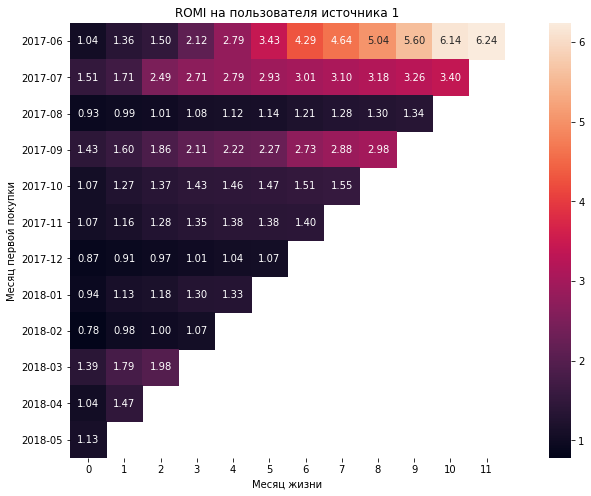

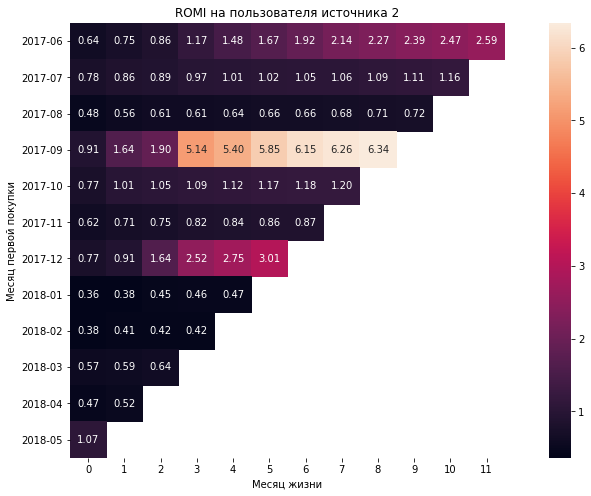

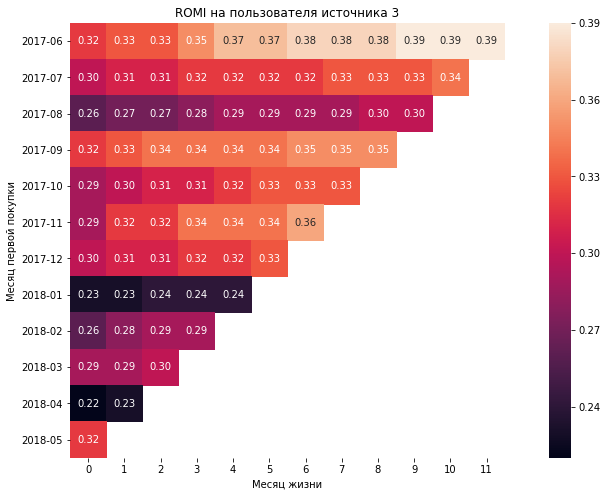

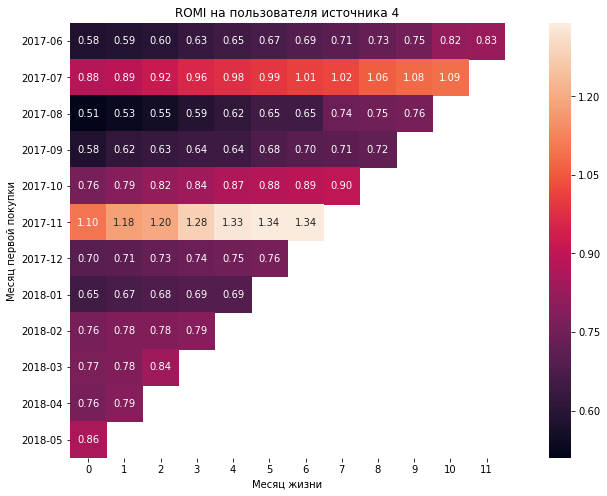

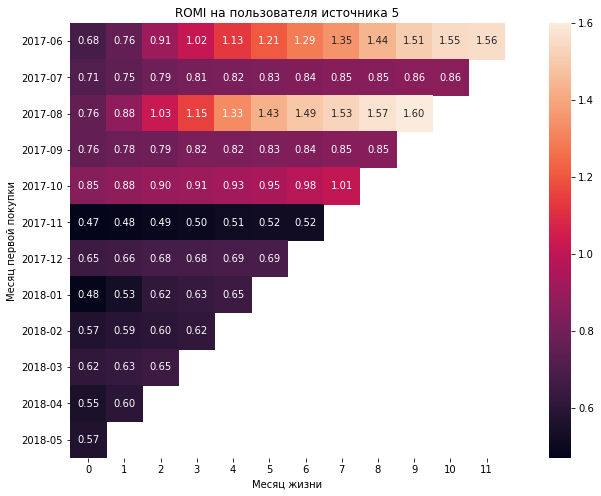

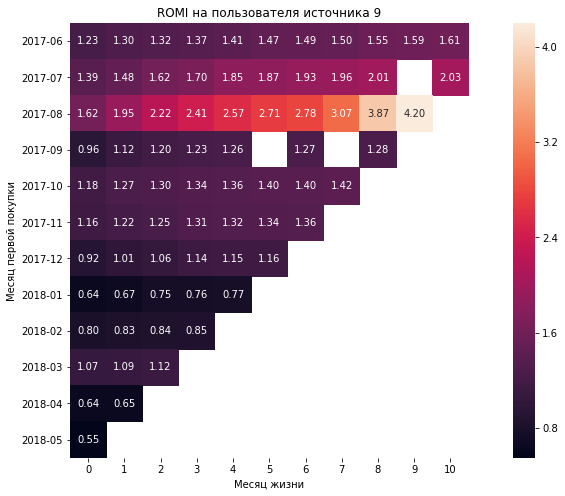

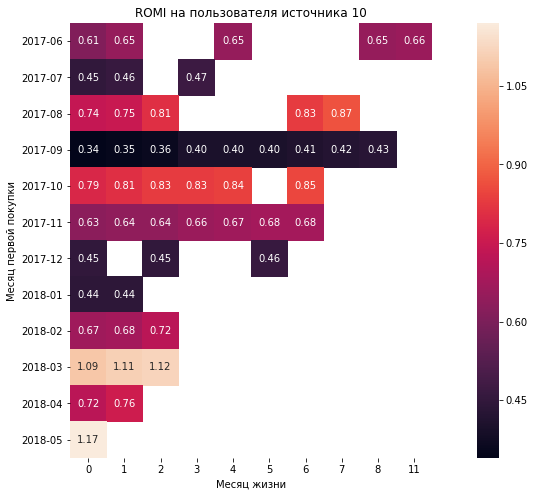

In [113]:
for i in source_list:
    plt.figure(figsize=(16,8))
    romi_pivot = report_new[report_new['source_id'] == i].pivot_table(
        index='first_activity_month',
        columns='age',
        values='romi',
        aggfunc='mean').cumsum(axis=1).round(2)
    sns.heatmap(romi_pivot, fmt='.2f', annot=True, linecolor='grey', square=True)
    plt.title('ROMI на пользователя источника {}' .format(i))
    plt.ylabel('Месяц первой покупки')
    plt.xlabel('Месяц жизни')
    plt.show()

Слишком низкие для отображения значения не отображены в полях графиков.

Несмотря на огромные траты по источникам номер 3, 4 и 5, они ROMI для них является самым низким среди всех остальных.
В первую очередь это означает, что эффективность этих источников крайне мала и крупные денежные вливания в эти источники нецелесообразны.
Исходя из данных на графике, самыми доходными с точки зрения возврата инестиций оказались источники с наименьшими денежными вливаниями - 1, 9 и 10. Причем источники 9 и 10 показывают просто космические результаты.

# Выводы и рекомендации

<hr style="border: 2px solid blue;" />

Главные источники, на которые стоит делать упор - это источники номер 1 (САС - 0.59 у.е.), 9 (САС - 0.16 у.е.) и 10 (САС - 0.16 у.е.). Данные источники являются самыми эффективными исходя из затрат на одного пользователя и возврата инвестиций. ROMI источников 9 и 10 составляют от 2700 % до 9000 %.

Несмотря на то, что каждый из источников окупается, стоит сделать упор на три источника, описанные выше. Они наиболее эффективно расходуют ресурсы.

### Выводы, сформулированные после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции;


#### Продуктовые метрики:

Судя по всему, количество уникальных пользователей также, как и количество посещений Яндекс.Афиши возрастает с августа к концу года и затем снижается к летнему периоду.

Активные пики посещений и заказов - август, сентябрь, ноябрь, а также май.

Думаю, в августе активность пользователей может возрастать в связи с окончанием сезона отпусков, а к концу года и в мае в связи с приближением праздников

Если не учитывать низкий процент повторных заказов в целом, то Retention Rate лучше всего сохраняется у пользователей, совершивших первые покупки с мая до августа.

#### Метрики электронной коммерции:

В среднем, от начала сессии до покупки проходит 32 минуты.

В среднем, пользователи совершают 1-2 заказа в месяц. В расчет у нас взят период мая по октябрь 2017 года. Не смотря на рост заказов к сентябрю, количество заказов на одного пользователя практически не изменяется, что говорит о слабом удержании клиентов после первой покупки.

Средний чек по месяцам изменяется не существенно, кроме декабря. Перед новым годом средний чек резко увеличивается.

Средний LTV за 6 месяцев составляет 8.3 у.е. на одного пользователя.

#### Маркетинговые метрики:

Наиболее затратным является источник номер 3, наименее затратным - источник номер 9. Топ три по затратам - 3-й, 4-й и 5-й.

Общая сумма трат на маркетинг составляет 329 тысяч у.е.

Периоды маркетинговой активности - В каждом источнике затраты постепенно снижаются к концу августа и резко возрастают с сентября до декабря. После нового года затраты начинают постепенно снижаться.

CAC для всего проекта равен 1.4 у.е. на одного привлеченного пользователя, что является хорошим показателем, если учесть, что каждый пользователь за 6 месяцев приносит 8.3 у.е.

Затраты на привлечение одного пользователя по кажому из источников возрастают к октябрю и с ноября по январь резко снижаются, возрастая вновь с февраля. Источник номер 3 является самым дорогим по привлечению одного пользователя.

### Подведем итог

Самыми перспективными когортами являются когорты мая, августа и сентября 2017 года, поскольку их активность сохраняется лучше всего.